# Lab1
Welcome to the Turtlebot4 Orientation Lab. Here you will learn to:
* Read data from the robots services
* Drive the robot around
* Accuracy of the odometry

Next, just execute the code cells below in sequence, read the comments, the output, and see what happens.

Don't worry, you can modify this code as you like. First, let's confirm you know how to run the code.

In [ ]:
# This text box is called a cell.
# In this environment, a Jupyter Python Notebook, it contains Python code.
# Click on the triangle left of this box (cell) to execute it.
# The output will appear below.
print(1+1)

# Load Robot wrapper and initialize ROS
While the Turtlebot4 works using ROS2, you are using a wrapper around
ROS2 to make things more straight forward. 

You can inspect the wrapper by opening the file [/opt/robohub/humble/lib/python3.10/site-packages/turtlebot4_wrapper/\_\_init__.py](/opt/robohub/humble/lib/python3.10/site-packages/turtlebot4_wrapper/\_\_init__.py)

In [ ]:
import turtlebot4_wrapper

turtlebot4_wrapper.use_hardware()
# turtlebot4_wrapper.use_simulation()

# load ROS library
import rclpy
if not rclpy.ok():
    rclpy.init()

# Instantiate Wrapper. The subscribes and publishes the relevant topics and connects the actions.
if not "robot" in globals():
    robot = turtlebot4_wrapper.Robot()

# Example: Read data from topics: Battery charge state
Check Battery State. Note: 10% get you 10 minutes of runtime.


In [ ]:
# Make sure we have fresh data by waiting for a new message
robot.battery_state_future = rclpy.Future()
robot.spin_until_future_completed(robot.battery_state_future)

# Pretty print the contents of the message
print("Battery {0:2.3}%, charging with {1:2.2}A".format(
    robot.last_battery_state_msg.percentage*100,
    robot.last_battery_state_msg.current
))

# Example: Drive the robot via teleoperation
First, undock the robot using a preprogrammed behavior. Then open the visualization to drive the robot using buttons. After you are done, dock the robot again.

In [ ]:
robot.undock()

In [ ]:
robot.open_visualization()

In [ ]:
print("You can additional move the robot with your phone:")
robot.open_visualization(open_url=False,mobile_layout=True,display_qrcode=True)

On the new webpage In the foxglove visualizer, you can drive the robot with panels in the bottom right hand corner. After you are done exploring, position the robot so that it is approximately 1-2m away from the dock and is pointing towards the dock.

In [10]:
robot.dock()

irobot_create_msgs.action.Dock_Result(is_docked=False)

# Example: Drive a square shape
In this example the robot automatically drives a square shape. While this is interesting to watch, it shows also some challenges. Before you execute this, mark the start position on the floor using tape as shown below (TODO: picture. Place your start position such that the robot has at least 0.5m space to the front and 0.5m to the left. Then execute the next cell. The code will also start a background logging process so you can analyze the data later.

In [ ]:
# send_cmd_vel (forward_velocity, rotation_velocity, duration)
robot.reset_odometry() # make the robot think it is at position (0,0,0) 
robot.configure_logging(["/odom","/tf","/tf_static","/scan"]) # set topics which should be recorded
robot.start_logging() # start the background logging process
for iterations in range(10): # drive the square
    robot.set_cmd_vel(0.4, 0.0, 2.) # 0.1
    robot.set_cmd_vel(0.0, 0.5, 3.14)
    robot.set_cmd_vel(0.4, 0.0, 2.) # 0.1
    robot.set_cmd_vel(0.0, 0.5, 3.14)
    robot.set_cmd_vel(0.4, 0.0, 2.) # 0.1
    robot.set_cmd_vel(0.0, 0.5, 3.14)
    robot.set_cmd_vel(0.4, 0.0, 2.) # 0.1
    robot.set_cmd_vel(0.0, 0.5, 3.14)
logging_dir = robot.stop_logging()
log_data = robot.get_logging_data(logging_dir) # parse the logged data and import in python

Executing the next cell will open the log data in the visualizer.

In [ ]:
robot.open_logging_data_in_visualizer(logging_dir)
robot.delete_logging_data(logging_dir)

In [ ]:
# Plot data in the notebook
print("Collected {} samples".format(len(log_data['/odom'])))
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
# TODO: decide if x forward is really the way to go
plt.xlim([-1.5,0.2])
plt.ylim([-0.2,1.5])
for msg in log_data['/odom'][::20]:
    T3D = robot.convert_odom_to_transform(msg[1].pose.pose)
    T2D = robot.reduce_transform_to_2D(T3D)
    circ = Circle((-T2D[1,2],T2D[0,2]),0.1) # TODO: correct radius
    circ.set_fill(False)
    ax.add_patch(circ)
    angle = robot.rotation_from_transform(T2D)
    import math
    angle = angle/math.pi*180
    wedge = Wedge((-T2D[1,2],T2D[0,2]),0.1, angle+180+45, angle+360-45)
    ax.add_patch(wedge)

From the experiment, please try to explain two aspect:
* Discrepancies between the commanded robot motion and the executed one
* Discrepancies between the measured motion and the one you observed
Try to come up with an answer and write it in the next field

# Use this field

Later, after you are done with this lab please save this notebook. Then commit the repository and push it. Detailled instructions will follow, but this is how you submit your work in this course.

# Example: Drive robot and aquire odometry
Tape measure, tape. Optional: Laser pointer.

* Tape two parallel lines `0.2m` apart on the floor. These are start and finish lines `0.2m`.
* Place the robot at the start line
* Read data from the Odometry topic
* Command the robot to drive `0.2m` straight
* Read data from the Odometry topic.
Did the robot travel `0.2m`? Where could the error come from?

Modify the experiment to investigate the behavior for rotation. Instead of the start and finish line attach a laser pointer to the base and aim it at a reference point. Command the robot to turn one full revolution.

Reading:
- Odometry sensor: TODO: find link
- Quaternions: https://en.wikipedia.org/wiki/Quaternion#Quaternions_and_the_space_geometry


In [ ]:
# Use preprogrammed behavior: Drive off the dock in a controlled way
robot.undock()

In [ ]:
# Display raw data: Odometry based position
robot.odom_future = rclpy.Future()
pose1 = robot.spin_until_future_completed(robot.odom_future).pose.pose
print(pose1.position)
print(pose1.orientation)

In [ ]:
# Drive with desired velocity command:
velocity_x = 0.1 # in m/s
velocity_phi = 0. # for rotation test use 0.5 rad/s
duration = 2. # in s
robot.set_cmd_vel(velocity_x, velocity_phi, duration)

In [ ]:
# Display raw data: Odometry based position
robot.odom_future = rclpy.Future()
pose2 = robot.spin_until_future_completed(robot.odom_future).pose.pose
print(pose2.position)
print(pose2.orientation)

In [ ]:
# translation
print("Desired distance: {}".format(velocity_x*duration))
import numpy
print("Measured distance: {}".format(
    numpy.sqrt( (pose1.position.x - pose2.position.x)**2 + (pose1.position.y - pose2.position.y)**2 ) ))

# rotation
import eigenpy # makes use of the Eigen C++ library ()
def make_quaternion(q):
    return eigenpy.Quaternion(q.w,q.x,q.y,q.z)
print("Desired rotation: {}".format(
    velocity_phi * duration))
print("Measured rotation: {}".format(
    make_quaternion(pose1.orientation).angularDistance(make_quaternion(pose2.orientation))))


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Plot robot position from odometry
# Use blue cross marker to designate the robot position
robot.odom_future = rclpy.Future()
robot.scan_future = rclpy.Future()
robot.spin_until_future_completed(robot.odom_future)
robot.spin_until_future_completed(robot.scan_future)
pose = robot.last_odom_msg.pose.pose
# pose = robot.spin_until_future_completed(robot.odom_future).pose.pose
plt.plot([pose.position.x],[pose.position.y],'bx') # TODO: show robot front

# not sure why but this sometimes hangs here so I pulled out the static transform manually into T_base_lidar
# T_base_lidar = robot.get_tf_transform("rplidar_link","base")
# T_base_lidar = robot.reduce_transform_to_2D(T_base_lidar)

T_base_lidar = np.array([[ 2.22044605e-16, -1.00000000e+00, -4.00000000e-02],
       [ 1.00000000e+00,  2.22044605e-16,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

# Plot lidar points from last message
def plot_lidar_scan_points(msg,pose):
    # Convert received lidar points into cartesian coordinates considering the current position from odometry
    import numpy
    points = [(numpy.cos(angle)*radius,numpy.sin(angle)*radius) for angle, radius \
              in zip(numpy.linspace(msg.angle_min,msg.angle_max,len(msg.ranges)),msg.ranges)]

    T = robot.reduce_transform_to_2D(robot.convert_odom_to_transform(pose))
    
    # remove points which cannot be measured
    filtered_points = filter(lambda x: numpy.isfinite(x).all(),points)
    
    # display points in world frame
    transformed_points = [numpy.matmul(np.dot(T,T_base_lidar),
        numpy.vstack([ numpy.atleast_2d(x).T,numpy.ones((1,1)) ]) ) for x in 
                          filtered_points]
    plt.plot(
        [x[0] for x in transformed_points],
        [x[1] for x in transformed_points],'r.')

plot_lidar_scan_points(robot.last_scan_msg,pose)

Lidar Scan Plot Close overlap

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import time

# Initialize empty lists to store lidar scan points
lidar_scan_points = []

# Initialize lists to store robot's position for visualization
x_positions = []
y_positions = []

# Function to update the lidar scan points
def update_lidar_scan_points(msg, pose):
    # Convert received lidar points into Cartesian coordinates considering the current position from odometry
    import numpy
    points = [(numpy.cos(angle) * radius, numpy.sin(angle) * radius) for angle, radius in zip(numpy.linspace(msg.angle_min, msg.angle_max, len(msg.ranges)), msg.ranges)]

    T = robot.reduce_transform_to_2D(robot.convert_odom_to_transform(pose))

    # Remove points which cannot be measured
    filtered_points = filter(lambda x: numpy.isfinite(x).all(), points)

    # Display points in the world frame
    transformed_points = [numpy.matmul(np.dot(T, T_base_lidar),
                                       numpy.vstack([numpy.atleast_2d(x).T, numpy.ones((1, 1))])) for x in
                          filtered_points]

    # Exclude points that overlap with existing lidar_scan_points
    unique_points = [point for point in transformed_points if not any(np.all(np.isclose(point, existing_point)) for existing_point in lidar_scan_points)]

    # Extend the lidar_scan_points list with the unique points
    lidar_scan_points.extend(unique_points)

# Initialize the plot
plt.figure()
plt.title('Robot Position and Accumulated Lidar Scan Data')
plt.xlabel('X')
plt.ylabel('Y')

# Set the desired duration for data collection in seconds
collection_duration = 10  # Collect data for n seconds (adjust as needed)

# Start time for data collection
start_time = time.time()

# Update the lidar scan points and monitor robot's position
while time.time() - start_time < collection_duration:
    # Continuously update the robot's position and LiDAR data
    update_lidar_scan_points(robot.last_scan_msg, robot.last_odom_msg.pose.pose)
    x_positions.append(robot.last_odom_msg.pose.pose.position.x)
    y_positions.append(robot.last_odom_msg.pose.pose.position.y)
    time.sleep(2)  # Adjust the sleep time as needed

    # Print odometry data for verification
    robot.odom_future = rclpy.Future()
    robot.scan_future = rclpy.Future()
    robot.spin_until_future_completed(robot.odom_future)
    robot.spin_until_future_completed(robot.scan_future)
    # print("Odometry data received:", robot.last_odom_msg)

# Extract X and Y coordinates from the lidar_scan_points array
x_coordinates = [pose[0] for pose in lidar_scan_points]
y_coordinates = [pose[1] for pose in lidar_scan_points]

# Plot the accumulated lidar scan points
plt.plot(x_coordinates, y_coordinates, 'r.')

# Plot the robot's path
plt.plot(x_positions, y_positions, 'b-')
plt.plot(x_positions[-1], y_positions[-1], 'go', label="End Position")

# Display the final plot
plt.title('Robot Path and Accumulated Lidar Scan Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

DBSCAN CLUSTERING

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import time

# Initialize empty lists to store lidar scan points
lidar_scan_points = []

# Initialize lists to store robot's position for visualization
x_positions = []
y_positions = []

# Function to update the lidar scan points
def update_lidar_scan_points(msg, pose):
    import numpy

    # Convert received lidar points into Cartesian coordinates considering the current position from odometry
    points = [(np.cos(angle) * radius, np.sin(angle) * radius) for angle, radius in zip(np.linspace(msg.angle_min, msg.angle_max, len(msg.ranges)), msg.ranges)]

    T = robot.reduce_transform_to_2D(robot.convert_odom_to_transform(pose))

    # Remove points which cannot be measured
    filtered_points = filter(lambda x: np.isfinite(x).all(), points)

    # Display points in the world frame
    transformed_points = [np.matmul(np.dot(T, T_base_lidar),
                                    np.vstack([np.atleast_2d(x).T, np.ones((1, 1))])) for x in filtered_points]

    # Exclude points that overlap with existing lidar_scan_points
    unique_points = [point for point in transformed_points if not any(np.all(np.isclose(point, existing_point)) for existing_point in lidar_scan_points)]

    # Extend the lidar_scan_points list with the unique points
    lidar_scan_points.extend(unique_points)

# Initialize the plot
plt.figure()
plt.title('Robot Path and Lidar Scan Data')
plt.xlabel('X')
plt.ylabel('Y')

# Set the desired duration for data collection in seconds
collection_duration = 20  # Collect data for 180 seconds (adjust as needed)

# Start time for data collection
start_time = time.time()

# Update the lidar scan points and monitor robot's position
while time.time() - start_time < collection_duration:
    # Continuously update the robot's position and LiDAR data
    update_lidar_scan_points(robot.last_scan_msg, robot.last_odom_msg.pose.pose)
    x_positions.append(robot.last_odom_msg.pose.pose.position.x)
    y_positions.append(robot.last_odom_msg.pose.pose.position.y)
    # Optional: print("Odometry data received:", robot.last_odom_msg)
    time.sleep(1)  # Adjust the sleep time as needed

# Convert lidar_scan_points to numpy array
lidar_points_array = np.array(lidar_scan_points)

# Flatten the lidar points to 2D array
lidar_points_flat = lidar_points_array.reshape(-1, 2)

# Standardize the features
lidar_points_standardized = StandardScaler().fit_transform(lidar_points_flat)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(lidar_points_standardized)

# Extract X and Y coordinates for each cluster
for label in set(labels):
    if label == -1:
        # Points labeled as noise (not part of any cluster)
        noise_points = lidar_points_flat[labels == label]
        plt.plot(noise_points[:, 0], noise_points[:, 1], 'k.', label="Noise")
    else:
        # Points belonging to clusters
        cluster_points = lidar_points_flat[labels == label]
        plt.plot(cluster_points[:, 0], cluster_points[:, 1], '.', label=f"Cluster {label}")

# Plot the robot's path
plt.plot(x_positions, y_positions, 'b-')
plt.plot(x_positions[-1], y_positions[-1], 'go', label="End Position")

# Display the final plot
plt.title('Robot Path and Lidar Scan Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

SLAM BASIC ALGORITHM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
num_particles = 100
motion_noise = 0.1
measurement_noise = 0.1

# True map (binary occupancy grid)
true_map = np.array([[0, 0, 1, 1, 1],
                     [0, 0, 0, 1, 1],
                     [1, 1, 0, 0, 1],
                     [1, 1, 1, 0, 0]])

# Robot motion (ground truth)
true_motion = np.array([[1, 0],
                        [0, 1],
                        [-1, 0],
                        [0, -1]])

# Simulate noisy measurements
def generate_noisy_measurement(true_position):
    true_row, true_col = true_position
    true_distance = np.sqrt(true_row**2 + true_col**2)
    noise = np.random.normal(0, measurement_noise)
    noisy_distance = true_distance + noise
    return noisy_distance

# Initialize particles
particles = np.random.rand(num_particles, 2) * np.array(true_map.shape)

# Initialize belief
belief = np.zeros_like(true_map, dtype=float)

# Main loop
for t in range(len(true_motion)):
    # Move particles according to motion model
    particles += true_motion[t] + np.random.normal(0, motion_noise, particles.shape)

    # Update particle weights based on measurements
    weights = np.zeros(num_particles)
    for i in range(num_particles):
        particle_row, particle_col = particles[i].astype(int)
        true_position = np.array([particle_row, particle_col])  # Fix here
        particle_position = np.array([particle_row, particle_col])
        expected_distance = np.linalg.norm(true_position - particle_position)
        measured_distance = generate_noisy_measurement(true_position)
        weights[i] = np.exp(-0.5 * ((expected_distance - measured_distance) / measurement_noise)**2)

    # Normalize weights
    weights /= np.sum(weights)

    # Resample particles
    indices = np.random.choice(np.arange(num_particles), size=num_particles, p=weights)
    particles = particles[indices]

    # Update belief map
    belief.fill(0)
    for i in range(num_particles):
        row, col = particles[i].astype(int)
        belief[row, col] += 1

    # Display the result
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(true_map, cmap='gray', origin='upper')
    plt.title('True Map')

    plt.subplot(1, 2, 2)
    plt.imshow(belief, cmap='Blues', origin='upper', vmax=num_particles)
    plt.title('Belief Map')

    plt.show()


SLAM based on basic but blank output

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.patches import Rectangle
from scipy.stats import norm
from matplotlib import cm

# Initialize empty lists to store lidar scan points
lidar_scan_points = []

# Initialize occupancy grid map
map_resolution = 0.1  # meters per pixel
map_size_x = 20  # in meters
map_size_y = 20  # in meters
occupancy_grid_map = np.zeros((int(map_size_x / map_resolution), int(map_size_y / map_resolution)))

# Initialize robot's position for visualization
x_positions = []
y_positions = []

# Initialize the plot
fig, ax = plt.subplots()
ax.set_title('Robot Position and Occupancy Grid Map')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Plot the occupancy grid map
map_extent = [0, map_size_x, 0, map_size_y]
cax = ax.imshow(np.expand_dims(occupancy_grid_map, axis=2), cmap=cm.Greys, extent=map_extent)  # Add an extra dimension

# Function to update the lidar scan points and occupancy grid map
def update_lidar_and_map(msg, pose):
    global lidar_scan_points, occupancy_grid_map

    # Convert received lidar points into Cartesian coordinates considering the current position from odometry
    points = [(np.cos(angle) * radius, np.sin(angle) * radius) for angle, radius in
              zip(np.linspace(msg.angle_min, msg.angle_max, len(msg.ranges)), msg.ranges)]

    T = robot.reduce_transform_to_2D(robot.convert_odom_to_transform(pose))

    # Remove points which cannot be measured
    filtered_points = filter(lambda x: np.isfinite(x).all(), points)

    # Display points in the world frame
    transformed_points = [np.matmul(np.dot(T, T_base_lidar),
                                    np.vstack([np.atleast_2d(x).T, np.ones((1, 1))])) for x in
                          filtered_points]

    # Exclude points that overlap with existing lidar_scan_points
    unique_points = [point for point in transformed_points if
                     not any(np.all(np.isclose(point, existing_point)) for existing_point in lidar_scan_points)]

    # Extend the lidar_scan_points list with the unique points
    lidar_scan_points.extend(unique_points)

    # Update occupancy grid map
    for point in unique_points:
        row, col = point[:2] / map_resolution
        row, col = int(row), int(col)
        if 0 <= row < occupancy_grid_map.shape[0] and 0 <= col < occupancy_grid_map.shape[1]:
            occupancy_grid_map[row, col] += 1

    # Normalize the map for visualization purposes
    normalized_map = occupancy_grid_map / np.max(occupancy_grid_map)

    # Plot the updated occupancy grid map in real-time
    cax.set_array(np.expand_dims(normalized_map, axis=2))  # Add an extra dimension
    plt.pause(0.1)  # Adjust the pause time as needed

# Set the desired duration for data collection in seconds
collection_duration = 50  # Collect data for n seconds (adjust as needed)

# Start time for data collection
start_time = time.time()

# Update the lidar scan points and monitor robot's position
while time.time() - start_time < collection_duration:
    # Continuously update the robot's position and LiDAR data
    update_lidar_and_map(robot.last_scan_msg, robot.last_odom_msg.pose.pose)
    x_positions.append(robot.last_odom_msg.pose.pose.position.x)
    y_positions.append(robot.last_odom_msg.pose.pose.position.y)
    time.sleep(2)  # Adjust the sleep time as needed

    # Print odometry data for verification
    robot.odom_future = rclpy.Future()
    robot.scan_future = rclpy.Future()
    robot.spin_until_future_completed(robot.odom_future)
    robot.spin_until_future_completed(robot.scan_future)

# Extract X and Y coordinates from the lidar_scan_points array
x_coordinates = [pose[0] for pose in lidar_scan_points]
y_coordinates = [pose[1] for pose in lidar_scan_points]

# Plot the accumulated lidar scan points
ax.scatter(x_coordinates, y_coordinates, c='r', marker='.', label='Lidar Scan Points')

# Plot the robot's path
ax.plot(x_positions, y_positions, 'b-', label='Robot Path')
ax.plot(x_positions[-1], y_positions[-1], 'go', label="End Position")

# Display the final plot
ax.legend()
plt.show()




SLAM basic 2

NameError: name 'T_base_lidar' is not defined

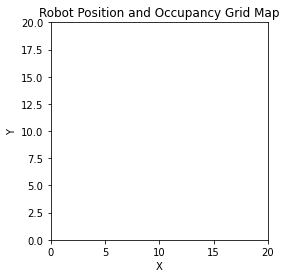

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.patches import Rectangle
from scipy.stats import norm
from matplotlib import cm

# Initialize empty lists to store lidar scan points
lidar_scan_points = []

# Initialize occupancy grid map
map_resolution = 0.1  # meters per pixel
map_size_x = 20  # in meters
map_size_y = 20  # in meters
occupancy_grid_map = np.zeros((int(map_size_x / map_resolution), int(map_size_y / map_resolution)))

# Initialize robot's position for visualization
x_positions = []
y_positions = []

# Initialize the plot
fig, ax = plt.subplots()
ax.set_title('Robot Position and Occupancy Grid Map')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Plot the occupancy grid map
map_extent = [0, map_size_x, 0, map_size_y]
cax = ax.imshow(occupancy_grid_map, cmap=cm.Greys, extent=map_extent)

# Function to update the lidar scan points and occupancy grid map
def update_lidar_and_map(msg, pose):
    global lidar_scan_points, occupancy_grid_map

    # Convert received lidar points into Cartesian coordinates considering the current position from odometry
    points = [(np.cos(angle) * radius, np.sin(angle) * radius) for angle, radius in
              zip(np.linspace(msg.angle_min, msg.angle_max, len(msg.ranges)), msg.ranges)]

    T = robot.reduce_transform_to_2D(robot.convert_odom_to_transform(pose))

    # Remove points which cannot be measured
    filtered_points = filter(lambda x: np.isfinite(x).all(), points)

    # Display points in the world frame
    transformed_points = [np.matmul(np.dot(T, T_base_lidar),
                                    np.vstack([np.atleast_2d(x).T, np.ones((1, 1))])) for x in
                          filtered_points]

    # Exclude points that overlap with existing lidar_scan_points
    unique_points = [point for point in transformed_points if
                     not any(np.all(np.isclose(point, existing_point)) for existing_point in lidar_scan_points)]

    # Extend the lidar_scan_points list with the unique points
    lidar_scan_points.extend(unique_points)

    # Update occupancy grid map
    for point in unique_points:
        row, col = point[:2] / map_resolution
        row, col = int(row), int(col)
        if 0 <= row < occupancy_grid_map.shape[0] and 0 <= col < occupancy_grid_map.shape[1]:
            occupancy_grid_map[row, col] += 1

    # Normalize the map for visualization purposes
    normalized_map = occupancy_grid_map / np.max(occupancy_grid_map)

    # Plot the updated occupancy grid map
    cax.set_data(normalized_map)
    plt.pause(0.1)  # Adjust the pause time as needed

# Set the desired duration for data collection in seconds
collection_duration = 50  # Collect data for n seconds (adjust as needed)

# Start time for data collection
start_time = time.time()

# Update the lidar scan points and monitor robot's position
while time.time() - start_time < collection_duration:
    # Continuously update the robot's position and LiDAR data
    update_lidar_and_map(robot.last_scan_msg, robot.last_odom_msg.pose.pose)
    x_positions.append(robot.last_odom_msg.pose.pose.position.x)
    y_positions.append(robot.last_odom_msg.pose.pose.position.y)
    time.sleep(2)  # Adjust the sleep time as needed

    # Print odometry data for verification
    robot.odom_future = rclpy.Future()
    robot.scan_future = rclpy.Future()
    robot.spin_until_future_completed(robot.odom_future)
    robot.spin_until_future_completed(robot.scan_future)

# Extract X and Y coordinates from the lidar_scan_points array
x_coordinates = [pose[0] for pose in lidar_scan_points]
y_coordinates = [pose[1] for pose in lidar_scan_points]

# Plot the accumulated lidar scan points
ax.scatter(x_coordinates, y_coordinates, c='r', marker='.', label='Lidar Scan Points')

# Plot the robot's path
ax.plot(x_positions, y_positions, 'b-', label='Robot Path')
ax.plot(x_positions[-1], y_positions[-1], 'go', label="End Position")

# Display the final plot
ax.legend()
plt.show()




Different Visualization

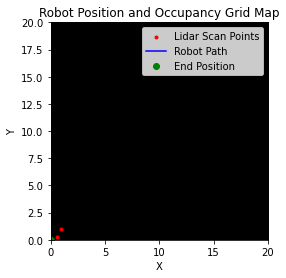

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 360 and the array at index 1 has size 0

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.patches import Rectangle

# Initialize empty list to store lidar scan points
lidar_scan_points = []

# Initialize occupancy grid map
map_resolution = 0.1  # meters per pixel
map_size_x = 20  # in meters
map_size_y = 20  # in meters
occupancy_grid_map = np.zeros((int(map_size_x / map_resolution), int(map_size_y / map_resolution)))

# Initialize robot's position for visualization
x_positions = []
y_positions = []

# Initialize the plot
fig, ax = plt.subplots()
ax.set_title('Robot Position and Occupancy Grid Map')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Plot the occupancy grid map
map_extent = [0, map_size_x, 0, map_size_y]
cax = ax.imshow(occupancy_grid_map, cmap='gray', extent=map_extent, origin='lower')

# Function to update the lidar scan points and occupancy grid map
def update_lidar_and_map(msg, pose):
    global lidar_scan_points, occupancy_grid_map, x_positions, y_positions

    # Convert received lidar points into Cartesian coordinates considering the current position from odometry
    points = np.array([(np.cos(angle) * radius, np.sin(angle) * radius) for angle, radius in
                       zip(np.linspace(msg['angle_min'], msg['angle_max'], len(msg['ranges'])), msg['ranges'])])

    # Remove points which cannot be measured
    filtered_points = points[np.isfinite(points).all(axis=1)]

    # Display points in the world frame
    T = np.array([[np.cos(pose['orientation']['z']), -np.sin(pose['orientation']['z']), pose['position']['x']],
                  [np.sin(pose['orientation']['z']), np.cos(pose['orientation']['z']), pose['position']['y']],
                  [0, 0, 1]])

    transformed_points = np.dot(T, np.vstack([filtered_points.T, np.ones(len(filtered_points))]))

    # Exclude points that overlap with existing lidar_scan_points
    unique_points = transformed_points[:, ~np.isin(transformed_points, lidar_scan_points).all(axis=0)]

    # Extend the lidar_scan_points list with the unique points
    lidar_scan_points.append(unique_points)

    # Update occupancy grid map
    row, col = (unique_points[:2] / map_resolution).astype(int)
    valid_indices = (0 <= row) & (row < occupancy_grid_map.shape[0]) & (0 <= col) & (col < occupancy_grid_map.shape[1])
    occupancy_grid_map[row[valid_indices], col[valid_indices]] += 1

    # Normalize the map for visualization purposes
    normalized_map = occupancy_grid_map / np.max(occupancy_grid_map)

    # Plot the updated occupancy grid map
    cax.set_array(normalized_map)

    # Update robot's position for visualization
    x_positions.append(pose['position']['x'])
    y_positions.append(pose['position']['y'])

    # Plot the accumulated lidar scan points
    if lidar_scan_points:
        ax.scatter(np.concatenate(lidar_scan_points)[:, 0], np.concatenate(lidar_scan_points)[:, 1], c='r', marker='.', label='Lidar Scan Points')

    # Plot the robot's path
    ax.plot(x_positions, y_positions, 'b-', label='Robot Path')
    ax.plot(x_positions[-1], y_positions[-1], 'go', label="End Position")

    # Display the final plot
    ax.legend()

# Set the desired duration for data collection in seconds
collection_duration = 50  # Collect data for n seconds (adjust as needed)

# Start time for data collection
start_time = time.time()

# Replace this with your actual robot initialization logic
# For simplicity, we'll use placeholder values for lidar scan and robot pose
robot_last_scan_msg = {'angle_min': 0, 'angle_max': 2 * np.pi, 'ranges': np.random.rand(360)}
robot_last_odom_pose = {'position': {'x': 0, 'y': 0}, 'orientation': {'z': 0}}

# Update the lidar scan points and monitor robot's position
while time.time() - start_time < collection_duration:
    # Continuously update the robot's position and LiDAR data
    update_lidar_and_map(robot_last_scan_msg, robot_last_odom_pose)
    plt.pause(0.1)  # Adjust the pause time as needed

# Display the final plot
plt.show()



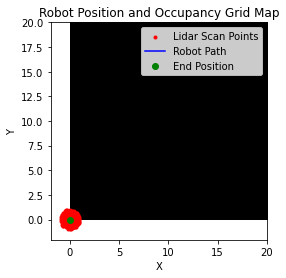

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Initialize empty list to store lidar scan points
lidar_scan_points = []

# Initialize occupancy grid map
map_resolution = 0.1  # meters per pixel
map_size_x = 20  # in meters
map_size_y = 20  # in meters
occupancy_grid_map = np.zeros((int(map_size_x / map_resolution), int(map_size_y / map_resolution)))

# Initialize robot's position for visualization
x_positions = []
y_positions = []

# Initialize the plot
fig, ax = plt.subplots()
ax.set_title('Robot Position and Occupancy Grid Map')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Plot the occupancy grid map
map_extent = [0, map_size_x, 0, map_size_y]
cax = ax.imshow(occupancy_grid_map, cmap='gray', extent=map_extent, origin='lower')

# Function to update the lidar scan points and occupancy grid map
def update_lidar_and_map(msg, pose):
    global lidar_scan_points, occupancy_grid_map, x_positions, y_positions

    # Convert received lidar points into Cartesian coordinates considering the current position from odometry
    points = np.array([(np.cos(angle) * radius, np.sin(angle) * radius) for angle, radius in
                       zip(np.linspace(msg['angle_min'], msg['angle_max'], len(msg['ranges'])), msg['ranges'])])

    # Remove points which cannot be measured
    filtered_points = points[np.isfinite(points).all(axis=1)]

    # Display points in the world frame
    T = np.array([[np.cos(pose['orientation']['z']), -np.sin(pose['orientation']['z']), pose['position']['x']],
                  [np.sin(pose['orientation']['z']), np.cos(pose['orientation']['z']), pose['position']['y']],
                  [0, 0, 1]])

    transformed_points = np.dot(T, np.vstack([filtered_points.T, np.ones(len(filtered_points))]))

    # Exclude points that overlap with existing lidar_scan_points
    unique_points = transformed_points[:, ~np.isin(transformed_points, lidar_scan_points).all(axis=0)]

    # Extend the lidar_scan_points list with the unique points
    lidar_scan_points.extend(unique_points.T)

    # Update occupancy grid map
    row, col = (unique_points[:2] / map_resolution).astype(int)
    valid_indices = (0 <= row) & (row < occupancy_grid_map.shape[0]) & (0 <= col) & (col < occupancy_grid_map.shape[1])
    occupancy_grid_map[row[valid_indices], col[valid_indices]] += 1

    # Normalize the map for visualization purposes
    normalized_map = occupancy_grid_map / np.max(occupancy_grid_map)

    # Plot the updated occupancy grid map
    cax.set_array(normalized_map)

    # Update robot's position for visualization
    x_positions.append(pose['position']['x'])
    y_positions.append(pose['position']['y'])

    # Plot the accumulated lidar scan points
    if lidar_scan_points:
        scan_points_array = np.array(lidar_scan_points)
        ax.scatter(scan_points_array[:, 0], scan_points_array[:, 1], c='r', marker='.', label='Lidar Scan Points')

    # Plot the robot's path
    ax.plot(x_positions, y_positions, 'b-', label='Robot Path')
    ax.plot(x_positions[-1], y_positions[-1], 'go', label="End Position")

    # Display the final plot
    ax.legend()

# Set the desired duration for data collection in seconds
collection_duration = 50  # Collect data for n seconds (adjust as needed)

# Start time for data collection
start_time = time.time()

# Replace this with your actual robot initialization logic
# For simplicity, we'll use placeholder values for lidar scan and robot pose
robot_last_scan_msg = {'angle_min': 0, 'angle_max': 2 * np.pi, 'ranges': np.random.rand(360)}
robot_last_odom_pose = {'position': {'x': 0, 'y': 0}, 'orientation': {'z': 0}}

# Update the lidar scan points and monitor robot's position
while time.time() - start_time < collection_duration:
    # Continuously update the robot's position and LiDAR data
    update_lidar_and_map(robot_last_scan_msg, robot_last_odom_pose)
    plt.pause(0.1)  # Adjust the pause time as needed

# Display the final plot
plt.show()


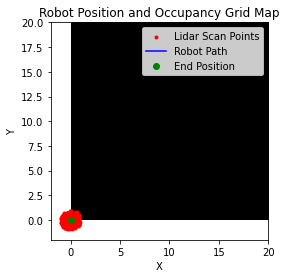

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Initialize empty list to store lidar scan points
lidar_scan_points = []

# Initialize occupancy grid map
map_resolution = 0.1  # meters per pixel
map_size_x = 20  # in meters
map_size_y = 20  # in meters
occupancy_grid_map = np.zeros((int(map_size_x / map_resolution), int(map_size_y / map_resolution)))

# Initialize robot's position for visualization
x_positions = []
y_positions = []

# Initialize the plot
fig, ax = plt.subplots()
ax.set_title('Robot Position and Occupancy Grid Map')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Plot the occupancy grid map
map_extent = [0, map_size_x, 0, map_size_y]
cax = ax.imshow(occupancy_grid_map, cmap='gray', extent=map_extent, origin='lower')

# Function to update the lidar scan points and occupancy grid map
def update_lidar_and_map(msg, pose):
    global lidar_scan_points, occupancy_grid_map, x_positions, y_positions

    # Convert received lidar points into Cartesian coordinates considering the current position from odometry
    points = np.array([(np.cos(angle) * radius, np.sin(angle) * radius) for angle, radius in
                       zip(np.linspace(msg['angle_min'], msg['angle_max'], len(msg['ranges'])), msg['ranges'])])

    # Remove points which cannot be measured
    filtered_points = points[np.isfinite(points).all(axis=1)]

    # Display points in the world frame
    T = np.array([[np.cos(pose['orientation']['z']), -np.sin(pose['orientation']['z']), pose['position']['x']],
                  [np.sin(pose['orientation']['z']), np.cos(pose['orientation']['z']), pose['position']['y']],
                  [0, 0, 1]])

    transformed_points = np.dot(T, np.vstack([filtered_points.T, np.ones(len(filtered_points))]))

    # Update lidar_scan_points
    lidar_scan_points.extend(transformed_points.T)

    # Update occupancy grid map
    row, col = (transformed_points[:2] / map_resolution).astype(int)
    valid_indices = (0 <= row) & (row < occupancy_grid_map.shape[0]) & (0 <= col) & (col < occupancy_grid_map.shape[1])
    occupancy_grid_map[row[valid_indices], col[valid_indices]] += 1

    # Normalize the map for visualization purposes
    normalized_map = occupancy_grid_map / np.max(occupancy_grid_map)

    # Plot the updated occupancy grid map
    cax.set_array(normalized_map)

    # Update robot's position for visualization
    x_positions.append(pose['position']['x'])
    y_positions.append(pose['position']['y'])

    # Plot the accumulated lidar scan points
    if lidar_scan_points:
        scan_points_array = np.array(lidar_scan_points)
        ax.scatter(scan_points_array[:, 0], scan_points_array[:, 1], c='r', marker='.', label='Lidar Scan Points')

    # Plot the robot's path
    ax.plot(x_positions, y_positions, 'b-', label='Robot Path')
    ax.plot(x_positions[-1], y_positions[-1], 'go', label="End Position")

    # Display the final plot
    ax.legend()

# Set the desired duration for data collection in seconds
collection_duration = 50  # Collect data for n seconds (adjust as needed)

# Start time for data collection
start_time = time.time()

# Replace this with your actual robot initialization logic
# For simplicity, we'll use placeholder values for lidar scan and robot pose
robot_last_scan_msg = {'angle_min': 0, 'angle_max': 2 * np.pi, 'ranges': np.random.rand(360)}
robot_last_odom_pose = {'position': {'x': 0, 'y': 0}, 'orientation': {'z': 0}}

# Update the lidar scan points and monitor robot's position
while time.time() - start_time < collection_duration:
    # Continuously update the robot's position and LiDAR data
    update_lidar_and_map(robot_last_scan_msg, robot_last_odom_pose)
    plt.pause(0.1)  # Adjust the pause time as needed

# Display the final plot
plt.show()
